# All path

- vertex_zip : 모든 vertex 리스트
- vertex_x : 모든 vertex의 x좌표 값
- vertex_y : 모든 vertex의 y좌표 값
- vertices_all: 모든 vertex 리스트 + 번호 정보
- vertices_xy : 모든 vertex 좌표 리스트

In [170]:
import csv
## 최적 경로를 확인하려는 도시의 csv를 먼저 넣어줘야한다.
f = open('New_York.csv','r') 
next(f) ## 첫째줄 건너뛰기
rdr = csv.reader(f)
vertex_zip = list()
vertex_xy_zip = list()

for vertex in rdr:
    vertex_xy_zip.append([vertex[2], vertex[1]])
    vertex_zip.append([vertex[0], vertex[1], vertex[2]])
    print(vertex)
 
f.close()

['0', '40.730823', '-73.997332']
['1', '40.765478', '-73.97393']
['2', '40.715327', '-73.975452']
['3', '40.753597', '-73.983233']
['4', '40.715052', '-74.000082']
['5', '40.692036', '-74.000534']
['6', '40.642429', '-73.961742']
['7', '40.786928', '-73.9523']
['8', '40.781667', '-73.966667']
['9', '40.791861', '-73.776104']
['10', '40.645532', '-74.012385']
['11', '40.72226', '-73.991316']
['12', '40.75027', '-73.99864']
['13', '40.742967', '-73.814312']
['14', '40.78409', '-73.958561']
['15', '40.759155', '-73.953309']
['16', '40.781979', '-73.972014']
['17', '40.763671', '-73.770982']
['18', '40.717072', '-74.015524']
['19', '40.756034', '-73.986945']
['20', '40.713296', '-73.958356']
['21', '40.689759', '-73.85619']
['22', '40.705064', '-74.010121']
['23', '40.732017', '-73.982069']
['24', '40.698476', '-73.990469']
['25', '40.59533', '-74.062896']
['26', '40.781031', '-73.973104']
['27', '40.769276', '-73.924567']
['28', '40.706086', '-73.996864']
['29', '40.698219', '-73.989247']

In [171]:
## 문자열 -> float
vertices_all = [list(map(float, x)) for x in vertex_zip]
vertices_xy = [list(map(float, x)) for x in vertex_xy_zip]
print(vertices_xy)

vertex_x = list() # 모든 vertex의 x좌표 값
vertex_y = list() # 모든 vertex의 y좌표 값
vertex_num = list() #모든 vertex의 index

for i in vertices_all:
    vertex_num.append(i[0]) #vertex의 index만 저장
    vertex_x.append(i[2]) # x좌표값만 저장 
    vertex_y.append(i[1]) # y좌표값만 저장
print(vertex_num)
print(vertex_x)
print(vertex_y)  

[[-73.997332, 40.730823], [-73.97393, 40.765478], [-73.975452, 40.715327], [-73.983233, 40.753597], [-74.000082, 40.715052], [-74.000534, 40.692036], [-73.961742, 40.642429], [-73.9523, 40.786928], [-73.966667, 40.781667], [-73.776104, 40.791861], [-74.012385, 40.645532], [-73.991316, 40.72226], [-73.99864, 40.75027], [-73.814312, 40.742967], [-73.958561, 40.78409], [-73.953309, 40.759155], [-73.972014, 40.781979], [-73.770982, 40.763671], [-74.015524, 40.717072], [-73.986945, 40.756034], [-73.958356, 40.713296], [-73.85619, 40.689759], [-74.010121, 40.705064], [-73.982069, 40.732017], [-73.990469, 40.698476], [-74.062896, 40.59533], [-73.973104, 40.781031], [-73.924567, 40.769276], [-73.996864, 40.706086], [-73.989247, 40.698219], [-73.881158, 40.720299], [-73.993847, 40.718166], [-73.719162, 40.662892], [-73.986309, 40.608107], [-73.945851, 40.838578], [-73.946177, 40.777242], [-73.924593, 40.832863], [-73.957962, 40.6707], [-73.933728, 40.854165], [-73.997031, 40.715751], [-73.98999

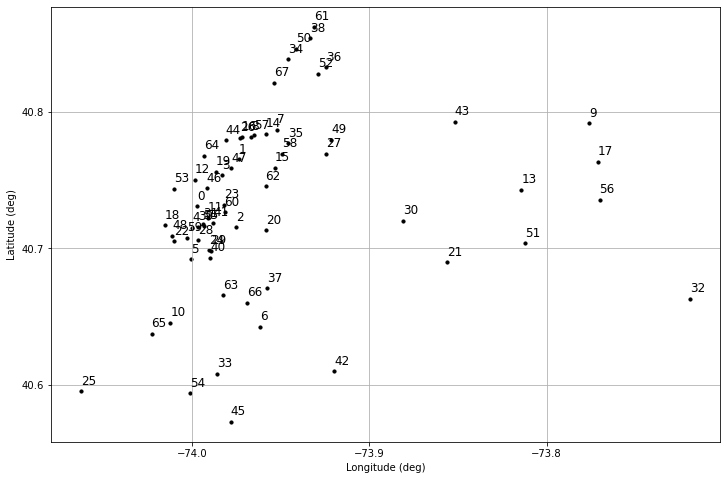

In [172]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import collections
import csv

## 주어진 vertex
##vertex = list()

##lines=collections.LineCollection(vertex,  linestyles='dotted', linewidth=1, color = 'black')

fig,axes=plt.subplots(figsize=(12,8))
plt.grid(True)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
axes.tick_params(axis='x', labelsize=10)
axes.tick_params(axis='y', labelsize=10)
axes.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
axes.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.scatter(vertex_x, vertex_y, marker='o', color='black', s=10)

for i in range(len(vertex_num)):
    height = vertex_y[i]
    plt.text(vertex_x[i], height + 0.005, '%d' %vertex_num[i], ha='left', va='baseline', size = 12)



axes.autoscale()
#plt.show()
#plt.savefig('South_Korea_airport_toy_example.jpg')

# Shortest_path

In [173]:
import csv
## 취에서 최적 경로를 확인하려는 도시의 csv를 먼저 넣어주고
## 여기서 최적경로 csv 파일을 넣어준다.
f = open('optimal_path.csv','r') 
rdr = csv.reader(f)

# 한줄씩 읽어오기
for line in rdr:
    print(line)
 
f.close()

['0', ' 11', ' 41', ' 31', ' 55', ' 39', ' 4', ' 59', ' 28', ' 24', ' 29', ' 40', ' 5', ' 22', ' 48', ' 18', ' 53', ' 12', ' 46', ' 3', ' 19', ' 47', ' 1', ' 64', ' 44', ' 26', ' 16', ' 8', ' 57', ' 14', ' 7', ' 35', ' 58', ' 15', ' 62', ' 23', ' 60', ' 2', ' 20', ' 37', ' 66', ' 63', ' 6', ' 10', ' 65', ' 33', ' 54', ' 45', ' 42', ' 21', ' 30', ' 51', ' 13', ' 56', ' 17', ' 9', ' 43', ' 49', ' 27', ' 67', ' 34', ' 50', ' 38', ' 61', ' 36', ' 52', ' 32', ' 25']


In [174]:
## shortest_path가 저장될 리스트
lines = list()
## 경로 저장 (문자열로 저장됨)
for i in range(0,len(line)):
    if(i+1 != len(line)):
        lines.append([line[i], line[i+1]])
        #print(lines[i])

## 문자열 -> Int    
lines = [list(map(int, x)) for x in lines]

for i in range(0,len(line)):
    if(i+1 != len(line)):
        print(lines[i])

[0, 11]
[11, 41]
[41, 31]
[31, 55]
[55, 39]
[39, 4]
[4, 59]
[59, 28]
[28, 24]
[24, 29]
[29, 40]
[40, 5]
[5, 22]
[22, 48]
[48, 18]
[18, 53]
[53, 12]
[12, 46]
[46, 3]
[3, 19]
[19, 47]
[47, 1]
[1, 64]
[64, 44]
[44, 26]
[26, 16]
[16, 8]
[8, 57]
[57, 14]
[14, 7]
[7, 35]
[35, 58]
[58, 15]
[15, 62]
[62, 23]
[23, 60]
[60, 2]
[2, 20]
[20, 37]
[37, 66]
[66, 63]
[63, 6]
[6, 10]
[10, 65]
[65, 33]
[33, 54]
[54, 45]
[45, 42]
[42, 21]
[21, 30]
[30, 51]
[51, 13]
[13, 56]
[56, 17]
[17, 9]
[9, 43]
[43, 49]
[49, 27]
[27, 67]
[67, 34]
[34, 50]
[50, 38]
[38, 61]
[61, 36]
[36, 52]
[52, 32]
[32, 25]


In [175]:
shortest_lines_zip = list()

for i in range(0, len(lines)):
    ## lines에서는 0번부터 시작하므로 1씩 빼준다.
    shortest_lines_zip.append([vertices_xy[lines[i][0]], vertices_xy[lines[i][1]]])
    print(lines[i][0], lines[i][1])

shortest_lines_zip.append([vertices_xy[lines[0][0]], vertices_xy[lines[len(lines)-1][1]]])
print(lines[len(lines)-1][1], lines[0][0])

#print(shortest_lines_zip)

0 11
11 41
41 31
31 55
55 39
39 4
4 59
59 28
28 24
24 29
29 40
40 5
5 22
22 48
48 18
18 53
53 12
12 46
46 3
3 19
19 47
47 1
1 64
64 44
44 26
26 16
16 8
8 57
57 14
14 7
7 35
35 58
58 15
15 62
62 23
23 60
60 2
2 20
20 37
37 66
66 63
63 6
6 10
10 65
65 33
33 54
54 45
45 42
42 21
21 30
30 51
51 13
13 56
56 17
17 9
9 43
43 49
49 27
27 67
67 34
34 50
50 38
38 61
61 36
36 52
52 32
32 25
25 0


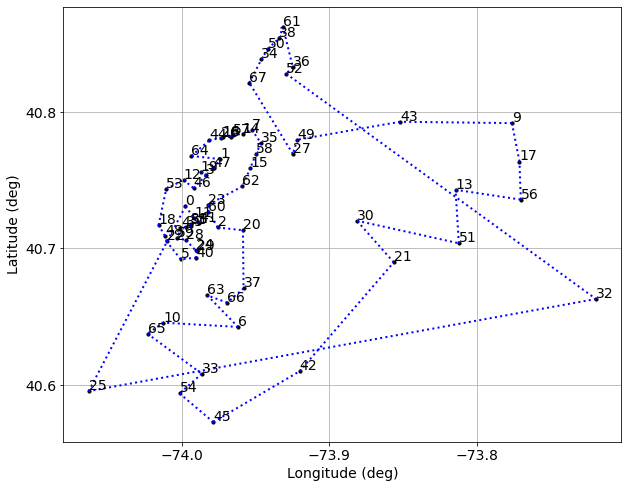

In [178]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import collections
import csv

lines_draw=collections.LineCollection(shortest_lines_zip,  linestyles='dotted', linewidth=2, color = 'blue')

fig,axes=plt.subplots(figsize=(10,8))
plt.grid(True)
plt.xlabel('Longitude (deg)', size=14)
plt.ylabel('Latitude (deg)', size=14)

axes.tick_params(axis='x', labelsize=14)
axes.tick_params(axis='y', labelsize=14)
axes.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
axes.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
axes.add_collection(lines_draw)
plt.scatter(vertex_x, vertex_y, marker='o', color='black', s=10)


for i in range(len(vertex_num)):
    height = vertex_y[i]
    plt.text(vertex_x[i], height + 0.001, '%d' %vertex_num[i], ha='left', va='baseline', size = 14)

axes.autoscale()

plt.savefig('Optimal_path.jpg')